Particle based simulation tutorial
==================

**Import LavaVu and create a Viewer object**

In [ ]:
import lavavu
lv = lavavu.Viewer()

**Create an initial set of random points and velocities**

In [ ]:
import random
import math

count = 1000 #Number of particles
positions = []
velocity = []

for p in range(0,count):
    #Random positions, with height offset of 3 added to y component
    positions.append([random.uniform(-0.05,0.05), 3 + random.uniform(-0.05,.05), random.uniform(-0.05,0.05)])

    #Random velocities for the points
    velocity.append([random.gauss(0,0.04), random.gauss(0,0.04), random.gauss(0,0.04)])


**Apply some global settings**

In [ ]:
#lv["gpucache"] = True        #Enable caching all data on GPU for speed (don't use for very large datasets)
lv["background"] = "#eeeeee" #Set the plot background colour
lv["axis"] = False
lv["border"] = False

#Here we can set a fixed bounding box
#Without this the bounding box is elastic and calculated to fit the geometry
#lv["min"] = [-1.0, -1.0, -1.0]
#lv["max"] = [1.0, 1.0, 1.0]

**Plot ground plane and axis lines as an example of some static data (not time-varying)**

This data remains in the visualisation regardless of the time step and must be loaded first, before the time varying data.


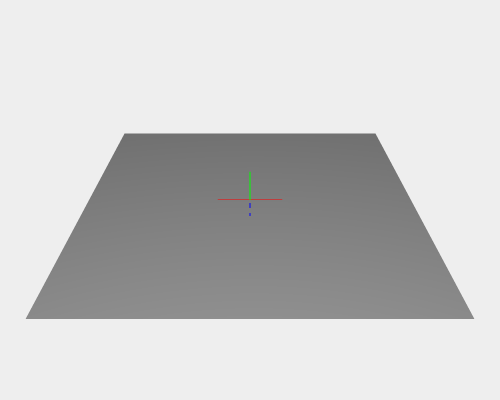

In [ ]:
lines = lv.lines(colours="red green blue")
lines.vertices([[-1.0, 0, 0], [1.0, 0, 0], [0, -1.0, 0], [0, 1.0, 0], [0, 0, -1.0], [0, 0, 1.0]])

ground = lv.triangles("ground", colour="darkgrey", cullface=False, dims=[2,2]);
gplane = [[-5, -5], [5, 5]]
ground.vertices([[gplane[0][0], 0.0, gplane[0][1]], 
                 [gplane[1][0], 0.0, gplane[0][1]],
                 [gplane[0][0], 0.0, gplane[1][1]],
                 [gplane[1][0], 0.0, gplane[1][1]]])

#Load an initial camera viewpoint
lv.translation(0.0, 0.0, -15)
lv.rotation(32, 0, 0)

#Plot an image to view the static elements we've loaded
lv.display(resolution=(500,400))

**Setup the particle drawing object**

In [ ]:
#Plot time varying data: points
points = lv.points(pointsize=5, pointtype="shiny", opacity=0.75)

#Apply a colourmap, cubeHelix() generates a map with monotonically increasing luminance
cmap = points.colourmap(lavavu.cubeHelix()) #, range=[0,0.1])

#Add a colour bar
points.colourbar();

In [ ]:
#Add a tracer visualisation to track particle positions
tracercount = len(positions)//50 #Track only the first 10% of the particles
tracers = lv.tracers(steps=300, scaling=0.5, glyphs=2, colourmap="red orange green")

**Advect the random particles and reload the positions for each time step**

In [ ]:
#This is a very simple toy particle simulation for the sake of demonstration only
steps = 300 #Number of steps to run for
for s in range(steps):
    values = []
    #Loop through particles
    for i in range(len(positions)):
        p = positions[i]
        v = velocity[i]
        
        for c in range(3):
            #Advect
            p[c] = p[c] + v[c]
            
            #Apply drag
            v[c] *= 0.99

        #Bounce off floor
        if p[1] < 0:
            p[1] = 0
            v[1] = -0.9*v[1]
                
        #Gravity
        v[1] -= 0.001

        #Values for the points: velocity magnitude
        #these values will be used to colour the points
        values.append(math.sqrt(v[0]*v[0] + v[1]*v[1] + v[2]*v[2]))

    #Add a new time step
    lv.addstep()

    #Load updated positions and values
    points.vertices(positions)
    points.values(values, "velocitymag")
    
    #Load tracer position data
    tracers.vertices(positions[0:tracercount])
        

**Get the timestep information**

In [ ]:
lv.timestep(0)
steps = lv.timesteps()
print(len(steps))
print(steps[0:10])

300
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**Filters allow elements to be filtered based on their data sets**

In [ ]:
#Clear filters
points["filters"] = []

#Filter to a range of values
myfilter = points.includemap('velocitymag', (0.0, 1.0))

#points["opacitymap"] = "rgba(0,0,0,0) rgba(0,0,0,1)"
#points["opacityby"] = "velocitymag"

**Build a control panel to view and modify the visualisation**

In [ ]:
lv.control.Panel()
lv.control.TimeStepper()
lv.control.Range("scalepoints", range=(1,10))
points.control.Range("pointsize")
points.control.Range("opacity")
points.control.Filter(myfilter)
points.control.List("pointtype")
tracers.control.Checkbox("flat", label="Flat Tracers")
tracers.control.Range("scaling", label="Tracer Arrow Size", range=(0.1,3), step=0.1)
lv.control.ObjectList()
lv.control.show()

**Get the current camera state**

This outputs the commands necessary to restore the camera to its current settings, which can be copied and pasted to save a viewpoint for re-use

In [ ]:
lv.camera()

lv.translation(0.0, 0.0, -15.0)
lv.rotation(32.0, 0.0, 0.0)


{'translate': [0.0, 0.0, -15.0],
 'rotate': [0.276, 0.0, 0.0, 0.961],
 'xyzrotate': [32.0, 0.0, 0.0],
 'aperture': 45.0}

**Create a video animation**

Before generating a video we change adjust the visualistion in the interactive view, or use a previously saved camera to set a nicer viewpoint as follows:

In [ ]:
lv.translation(-0.0697, 0.569, -14.536)
lv.rotation(0.14, 0.3, 0.02, 0.94)

In [ ]:
#lv.video(resolution=(500,400), fps=30)

In [ ]:
#lv.webgl()